# Contents

* Loading data
  * From CSV (pd.from_csv())
* Data manipulation
  * Summary info (.shape, .info(), .describe(), .nunique())
  * Viewing specific data (.loc, .iloc)
  * Filtering
  * DuckDB - to use SQL with Pandas
* Data exploration
  * Visualising
  * Feel for the data - value ranges, etc.

In [1]:
# Need either full path or relative path to your data
diabetes_filepath = 'Data & AI  PAN Datathon Nov 24/diabetes_data.csv'

In [2]:
# Import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# If not installed use (depending on your environment)
# conda install pandas
# python -m pip install pandas

In [3]:
# Read data in - creates pandas dataframe
diabetes_data = pd.read_csv(diabetes_filepath)

In [4]:
# Quick view of data
diabetes_data

,gender,age,hypertension,cholesterol_level_mgdL,diabetes_pedigree_function,diet_type,star_sign,BMI,Weight,family_diabetes_history,social_media_usage,physical_activity_level,sleep_duration,stress_level,Pregnancies,alcohol_consumption,diabetes
0,Male,26.0,NaN,182.0,0.365002,Carnivore,Libra,32.985795,90.0,0.0,Occasionally,Lightly Active,8.0,Elevated,1.0,Light,0
1,Female,87.0,0.0,207.0,NaN,Low-Carbohydrate,Taurus,24.293412,88.0,0.0,Never,Very Active,5.0,Extreme,NaN,Heavy,0
2,Male,41.0,0.0,202.0,2.459691,Carnivore,Cancer,32.727207,62.0,0.0,Excessive,Lightly Active,6.0,Low,0.0,Heavy,0
3,Male,82.0,1.0,168.0,1.132911,Gluten-Free,Gemini,39.232404,55.0,0.0,Moderate,NaN,6.0,Low,5.0,NaN,1
4,Male,34.0,0.0,209.0,2.151533,Mediterranean,Pisces,30.584301,91.0,NaN,NaN,Extremely Active,9.0,Low,4.0,Light,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Male,70.0,0.0,205.0,0.305457,Gluten-Free,Taurus,22.257296,78.0,1.0,Excessive,Very Active,6.0,Moderate,5.0,Light,0
99996,Female,85.0,0.0,NaN,0.961340,Standard American Diet,Aries,27.157629,126.0,1.0,Rarely,Sedentary,5.0,High,1.0,Moderate,1
99997,Male,54.0,0.0,244.0,0.391780,Gluten-Free,Pisces,34.856999,63.0,0.0,Excessive,Moderately Active,4.0,Extreme,1.0,NaN,0
99998,Female,NaN,1.0,201.0,1.822171,Vegan,Pisces,20.059562,58.0,1.0,Moderate,NaN,4.0,Elevated,5.0,Heavy,0


In [5]:
# Get shape of the data (in this case two dimensions) - other structures could have more
diabetes_data.shape

(100000, 17)

In [6]:
# iloc for getting individual rows or ranges of rows based on index
# [[]] for getting subsets of columns
print(diabetes_data.iloc[0:10][['gender', 'age']])

   gender   age
0    Male  26.0
1  Female  87.0
2    Male  41.0
3    Male  82.0
4    Male  34.0
5  Female  54.0
6    Male  67.0
7    Male  62.0
8    Male  37.0
9  Female  76.0


In [7]:
# Summary info at column level
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   gender                      95000 non-null   object 
 1   age                         95000 non-null   float64
 2   hypertension                95000 non-null   float64
 3   cholesterol_level_mgdL      95000 non-null   float64
 4   diabetes_pedigree_function  95000 non-null   float64
 5   diet_type                   95000 non-null   object 
 6   star_sign                   95000 non-null   object 
 7   BMI                         95000 non-null   float64
 8   Weight                      95000 non-null   float64
 9   family_diabetes_history     95000 non-null   float64
 10  social_media_usage          95000 non-null   object 
 11  physical_activity_level     95000 non-null   object 
 12  sleep_duration              95000 non-null   float64
 13  stress_level   

In [8]:
# Summary stats for numeric data
diabetes_data.describe()

,age,hypertension,cholesterol_level_mgdL,diabetes_pedigree_function,BMI,Weight,family_diabetes_history,sleep_duration,Pregnancies,diabetes
count,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000,100000.000000
mean,53.409337,0.401368,185.000516,1.250497,29.231255,99.389316,0.301326,6.500484,2.498347,0.343250
std,20.771938,0.490178,37.845420,0.721796,6.210759,28.925196,0.458837,1.706708,1.703484,0.474796
min,18.000000,0.000000,120.000000,0.000022,18.500113,50.000000,0.000000,4.000000,0.000000,0.000000
25%,35.000000,0.000000,152.000000,0.624267,23.858325,74.000000,0.000000,5.000000,1.000000,0.000000
50%,53.000000,0.000000,185.000000,1.252747,29.203262,99.000000,0.000000,7.000000,2.000000,0.000000
75%,71.000000,1.000000,218.000000,1.876822,34.607196,124.000000,1.000000,8.000000,4.000000,1.000000
max,89.000000,1.000000,250.000000,2.499991,39.999773,149.000000,1.000000,9.000000,5.000000,1.000000


In [9]:
# Number of unique values per column - helps identify if continuous, discrete, or categorical
diabetes_data.nunique()

gender                            2
age                              72
hypertension                      2
cholesterol_level_mgdL          131
diabetes_pedigree_function    95000
diet_type                         8
star_sign                        12
BMI                           95000
Weight                          100
family_diabetes_history           2
social_media_usage                5
physical_activity_level           5
sleep_duration                    6
stress_level                      5
Pregnancies                       6
alcohol_consumption               3
diabetes                          2
dtype: int64

In [10]:
# Basic filtering - can be extended to ranges, and do multiple filters
# DuckDB can be used to use SQL with Python
diabetes_data[diabetes_data['age']==30]

,gender,age,hypertension,cholesterol_level_mgdL,diabetes_pedigree_function,diet_type,star_sign,BMI,Weight,family_diabetes_history,social_media_usage,physical_activity_level,sleep_duration,stress_level,Pregnancies,alcohol_consumption,diabetes
151,Male,30.0,NaN,243.0,1.052234,Vegetarian,Aries,37.790522,91.0,0.0,Moderate,Lightly Active,9.0,High,5.0,Light,0
356,Female,30.0,1.0,208.0,0.087681,Vegetarian,Leo,27.724576,72.0,0.0,Occasionally,NaN,8.0,Moderate,NaN,Light,0
372,Female,30.0,0.0,223.0,2.273107,Carnivore,Gemini,19.447685,62.0,1.0,Excessive,Extremely Active,6.0,High,5.0,NaN,0
476,Male,30.0,1.0,129.0,2.262531,Standard American Diet,Sagittarius,NaN,NaN,NaN,Never,Moderately Active,5.0,High,4.0,Moderate,1
721,Male,30.0,0.0,174.0,1.749434,Standard American Diet,Gemini,37.901525,105.0,1.0,Rarely,Moderately Active,4.0,Extreme,2.0,Heavy,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99779,Male,30.0,0.0,154.0,2.069504,Gluten-Free,Gemini,37.067513,121.0,0.0,Rarely,Lightly Active,4.0,High,5.0,Heavy,0
99805,Female,30.0,0.0,155.0,2.496802,Mediterranean,Capricorn,30.226018,101.0,0.0,Never,Sedentary,7.0,Low,2.0,Heavy,0
99856,Female,30.0,1.0,210.0,0.224337,Vegetarian,Gemini,30.766282,NaN,0.0,Moderate,Extremely Active,6.0,Extreme,4.0,Light,0
99897,Female,30.0,1.0,159.0,2.474777,Pescatarian,Taurus,22.667658,131.0,0.0,Excessive,Sedentary,8.0,NaN,3.0,NaN,0


In [11]:
# Transforms on a column
diabetes_data['age']/100

# Can write the transform back to a column in the dataframe
#diabetes_data['age/100'] = diabetes_data['age']/100

0        0.26
1        0.87
2        0.41
3        0.82
4        0.34
         ... 
99995    0.70
99996    0.85
99997    0.54
99998     NaN
99999    0.63
Name: age, Length: 100000, dtype: float64

In [12]:
# Transformation on column using lambda function and .apply
diabetes_data['age'].apply(lambda x: x**0.5)

0        5.099020
1        9.327379
2        6.403124
3        9.055385
4        5.830952
           ...   
99995    8.366600
99996    9.219544
99997    7.348469
99998         NaN
99999    7.937254
Name: age, Length: 100000, dtype: float64

In [13]:
def divide100(num):
    return num/100

In [14]:
# Transformation on column using lambda calling other function for more complex transforms
diabetes_data['age'].apply(lambda x: divide100(x))

0        0.26
1        0.87
2        0.41
3        0.82
4        0.34
         ... 
99995    0.70
99996    0.85
99997    0.54
99998     NaN
99999    0.63
Name: age, Length: 100000, dtype: float64

<Axes: >

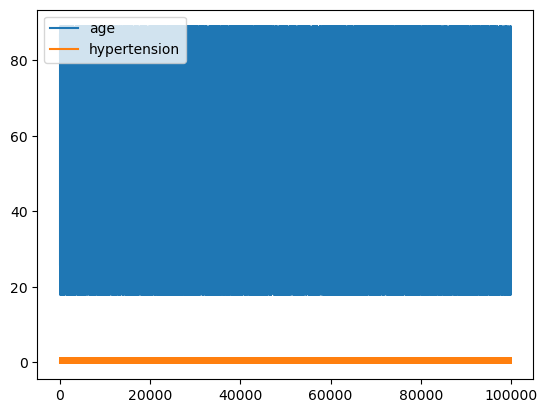

In [15]:
# Basic way to plot things from dataframe
diabetes_data[['age', 'hypertension']].plot()

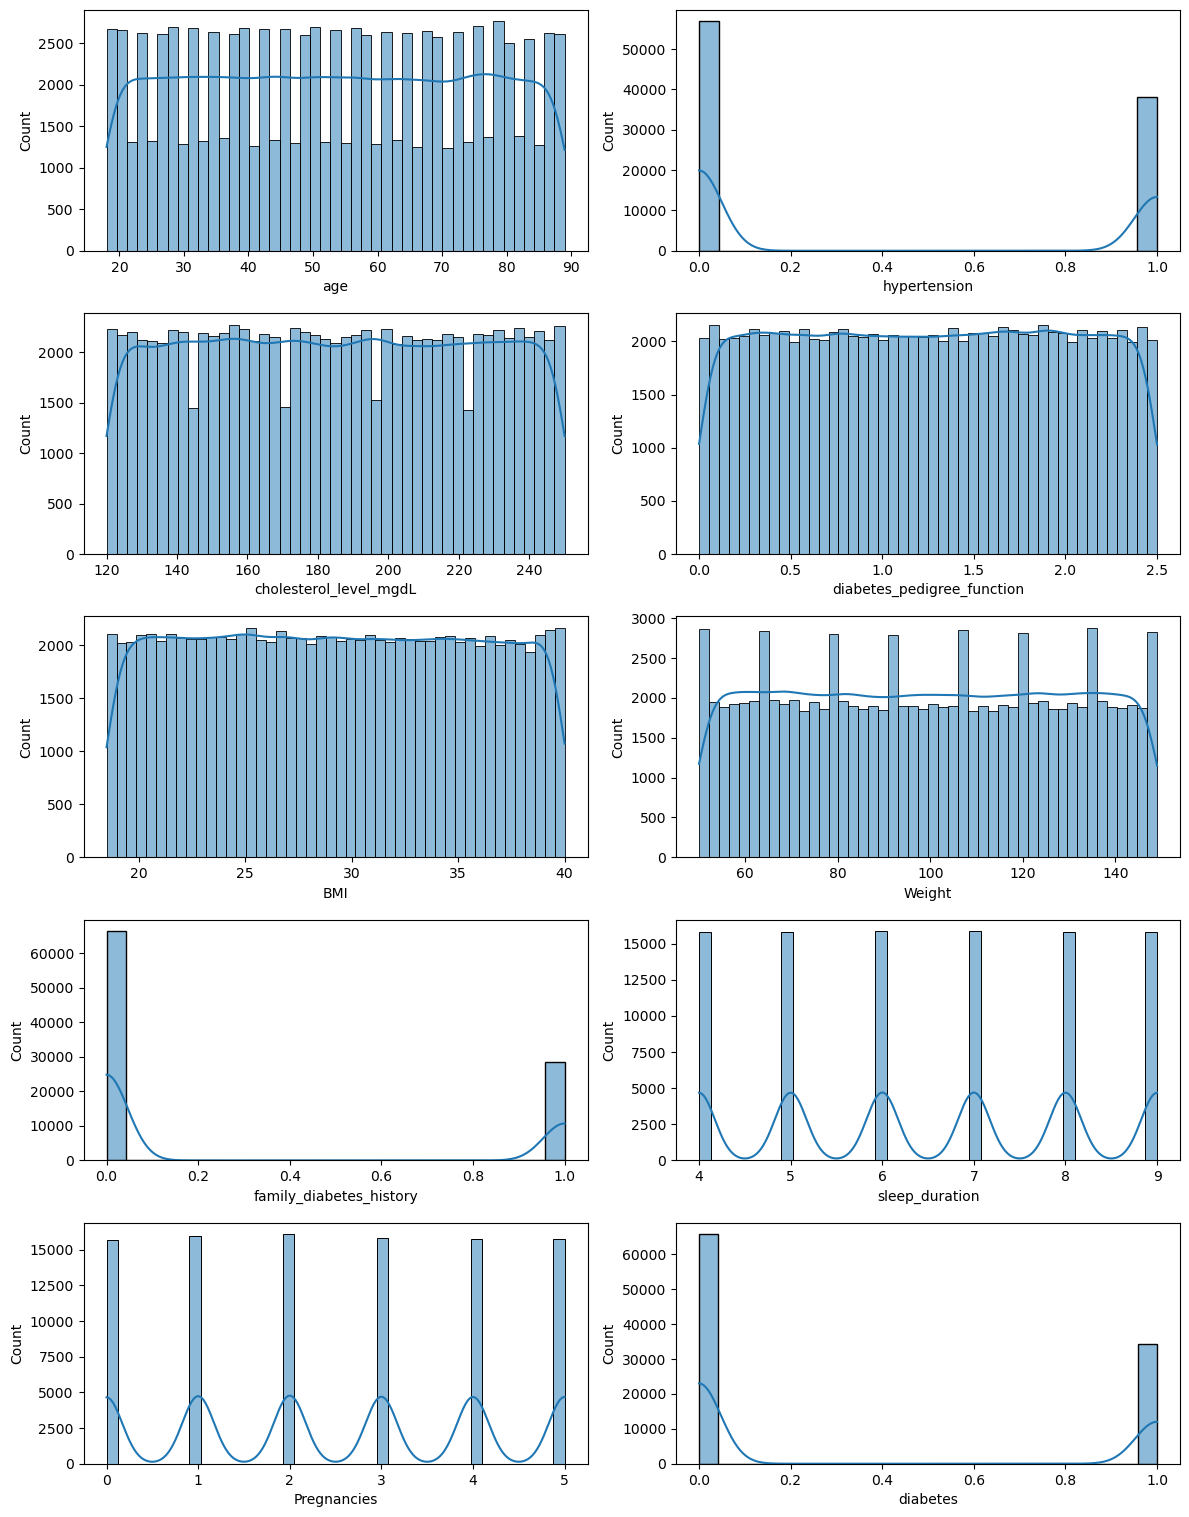

In [16]:
# Plot for numerical fields - summary view of values in fields
numerical_columns = diabetes_data.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(12, len(numerical_columns) * 3))
for i, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, i)
    sns.histplot(diabetes_data[feature], kde=True)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.pairplot(diabetes_data)
plt.show()

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Dealing with null values
#dropna
#fillna

# But you may be dropping more than you think if dropping nulls/Nans in all columns
diabetes_data.dropna().shape
